# Customer churn prediction model

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


## Exploratory Data Analysis

In [10]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [11]:
df[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0


In [12]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [13]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

<Axes: >

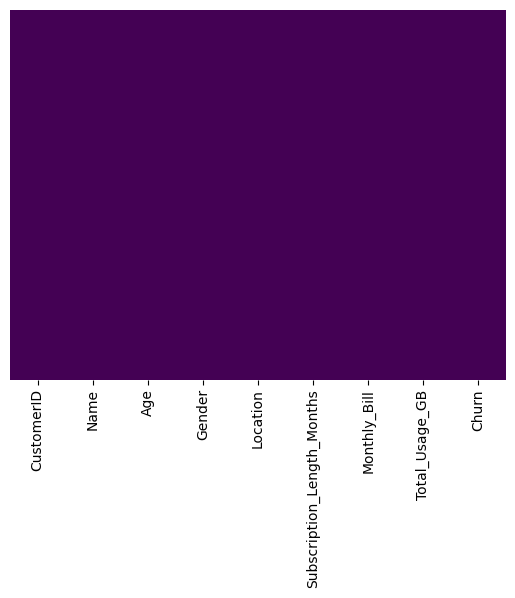

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
target_instance = df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

In [16]:
count_df = df.groupby(['Gender', 'Churn']).size().reset_index(name='Count')
pivoted_df = count_df.pivot(index='Gender', columns='Churn', values='Count').reset_index()


In [17]:
fig = px.bar(pivoted_df, x='Gender', y=[0,1], title='Churn rate by Gender', barmode="group", color_discrete_sequence=["green", "red"])
fig.show()

<Axes: >

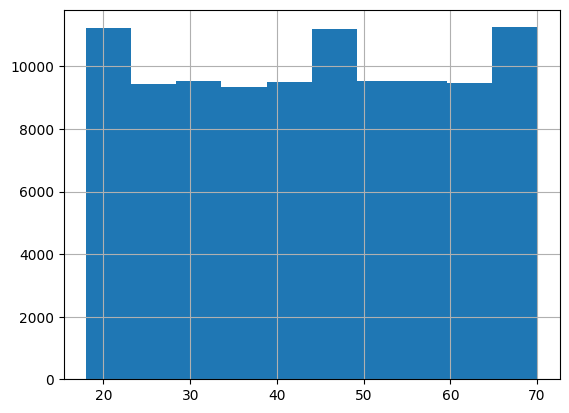

In [18]:
df['Age'].hist()

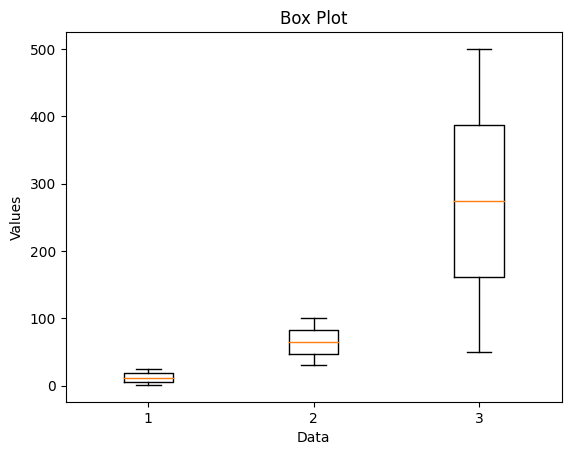

In [19]:
fig, ax = plt.subplots()


ax.boxplot(df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])

ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot')

plt.show()

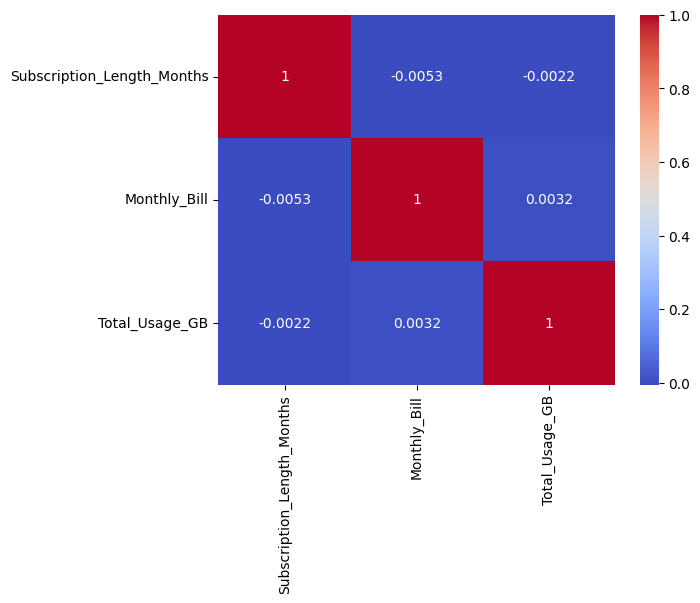

In [20]:
correlation_matrix = df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data preprocessing

In [39]:
df1 = df.copy()

In [40]:
# One Hot encoding
df1 = pd.get_dummies(df1, columns=['Location'])

In [41]:
df1 = pd.get_dummies(df1, columns=['Gender'])

In [42]:
df1

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
0,1,Customer_1,63,17,73.36,236,0,0,0,1,0,0,0,1
1,2,Customer_2,62,1,48.76,172,0,0,0,0,0,1,1,0
2,3,Customer_3,24,5,85.47,460,0,0,0,1,0,0,1,0
3,4,Customer_4,36,3,97.94,297,1,0,0,0,1,0,1,0
4,5,Customer_5,46,19,58.14,266,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,23,55.13,226,1,0,1,0,0,0,0,1
99996,99997,Customer_99997,62,19,61.65,351,0,0,0,0,0,1,1,0
99997,99998,Customer_99998,64,17,96.11,251,1,1,0,0,0,0,0,1
99998,99999,Customer_99999,51,20,49.25,434,1,0,0,0,0,1,1,0


In [43]:
df1 = df1.drop(['CustomerID'],axis=1)

In [44]:
df1 = df1.drop(['Name'],axis=1)

In [45]:
df1

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
0,63,17,73.36,236,0,0,0,1,0,0,0,1
1,62,1,48.76,172,0,0,0,0,0,1,1,0
2,24,5,85.47,460,0,0,0,1,0,0,1,0
3,36,3,97.94,297,1,0,0,0,1,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,0,1,0,0,0,0,1
99996,62,19,61.65,351,0,0,0,0,0,1,1,0
99997,64,17,96.11,251,1,1,0,0,0,0,0,1
99998,51,20,49.25,434,1,0,0,0,0,1,1,0


### Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df1['Subscription_Length_Months'] = sc.fit_transform(df1[['Subscription_Length_Months']])
df1['Monthly_Bill'] = sc.fit_transform(df1[['Monthly_Bill']])
df1['Total_Usage_GB'] = sc.fit_transform(df1[['Total_Usage_GB']])
df1['Age'] = sc.fit_transform(df1[['Age']])

In [47]:
df1

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
0,0.865385,0.695652,0.619429,0.413333,0,0,0,1,0,0,0,1
1,0.846154,0.000000,0.268000,0.271111,0,0,0,0,0,1,1,0
2,0.115385,0.173913,0.792429,0.911111,0,0,0,1,0,0,1,0
3,0.346154,0.086957,0.970571,0.548889,1,0,0,0,1,0,1,0
4,0.538462,0.782609,0.402000,0.480000,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.288462,0.956522,0.359000,0.391111,1,0,1,0,0,0,0,1
99996,0.846154,0.782609,0.452143,0.668889,0,0,0,0,0,1,1,0
99997,0.884615,0.695652,0.944429,0.446667,1,1,0,0,0,0,0,1
99998,0.634615,0.826087,0.275000,0.853333,1,0,0,0,0,1,1,0


In [49]:
df2 = df1.copy()

## Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [29]:
from sklearn.model_selection import train_test_split

In [50]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [51]:
model =  LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
y_true = df2['Churn']

In [56]:
acc_score = accuracy_score(y_test, y_pred)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred, average='weighted')
print("f1_score: ",f_score)


accuracy:  0.4997
precision:  0.4967153884053211
recall:  0.40518454015674193
f1_score:  0.49523435098378543


In [59]:
model.score(X_test, y_test)

0.4997

In [64]:
model1 =  RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [65]:
acc_score = accuracy_score(y_test, y_pred1)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred1, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.49723333333333336
precision:  0.49463040446304046
recall:  0.47511554692209795
f1_score:  0.49699266742699144


In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [69]:
conf_matrix

array([[8942, 6129],
       [8880, 6049]])